In [1]:
import pandas as pd
from sklearn import metrics
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/TEST_DATA_WITH_MICE_IMPUTED_DEMOGRAPHICS.csv")


In [3]:
df.columns


Index(['Unnamed: 0', 'Description', 'Post', 'District', 'Neighborhood',
       'Longitude', 'Latitude', 'Premise', 'Month', 'Hour', 'Year', 'Outside',
       'Season_autumn', 'Season_spring', 'Season_summer', 'Season_winter',
       'Weapon_FIREARM', 'Weapon_HANDS', 'Weapon_KNIFE', 'Weapon_NONE',
       'Weapon_OTHER', 'Holiday', 'Weekend', 'median_household_income',
       'households_below_poverty', 'perc18_24', 'perc25_64', 'perc65up',
       'perc_asian', 'perc_aa', 'perc_hisp', 'perc_white',
       'median_price_homes_sold', 'racial_diversity_index', 'num_households'],
      dtype='object')

In [4]:
df = df.drop(columns=["Unnamed: 0","Post","District","Longitude","Latitude","Year","Season_autumn","Season_spring","Season_summer","Season_winter",])


In [5]:
X_test = df.drop(columns = ['Description'])
Y_test = df['Description']

In [6]:
MODEL = lgb.Booster(model_file="DEMO_LGBM_MODEL.txt")


In [7]:
prediction_probs = MODEL.predict(X_test)

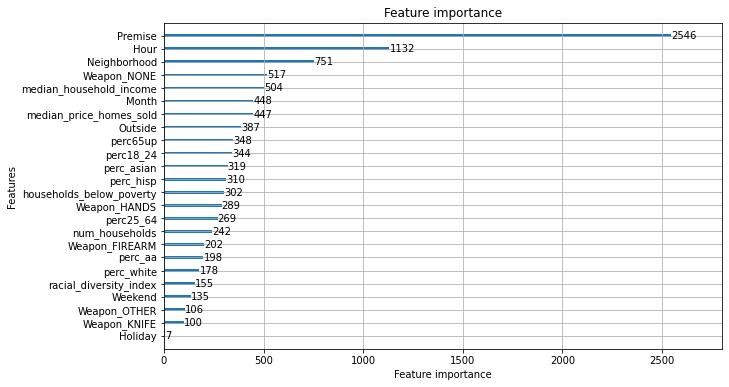

In [100]:
imp = lgb.plot_importance(MODEL, figsize=(10,6))


In [9]:
predictions = []

In [10]:
for i in range(len(prediction_probs)):
    predictions.append(np.where(prediction_probs[i]==np.max(prediction_probs[i]))[0][0])


In [11]:
metrics.accuracy_score(predictions,Y_test)

0.1706410532287408

In [12]:
metrics.recall_score(predictions,Y_test,average="weighted",zero_division=0)

0.1706410532287408

In [13]:
metrics.precision_score(predictions,Y_test,average="weighted",zero_division=0)

0.925455929821727

In [14]:
metrics.f1_score(predictions,Y_test,average="weighted",zero_division=0)

0.276710140917265

In [15]:
from sklearn.metrics import confusion_matrix


In [67]:
set(predictions)

{1, 4, 5, 9, 13, 14}

In [68]:
set(Y_test)

{0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}

In [69]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Description = pd.read_csv("../data/V2_Description_decoder.csv", header=None)
le.fit(Description[0])

LabelEncoder()

In [70]:
predictions=le.inverse_transform(predictions)


In [71]:
Y_test = le.inverse_transform(Y_test)

In [89]:
cm = confusion_matrix(Y_test, predictions,labels=list(Description[0]))


In [18]:
import seaborn as sns


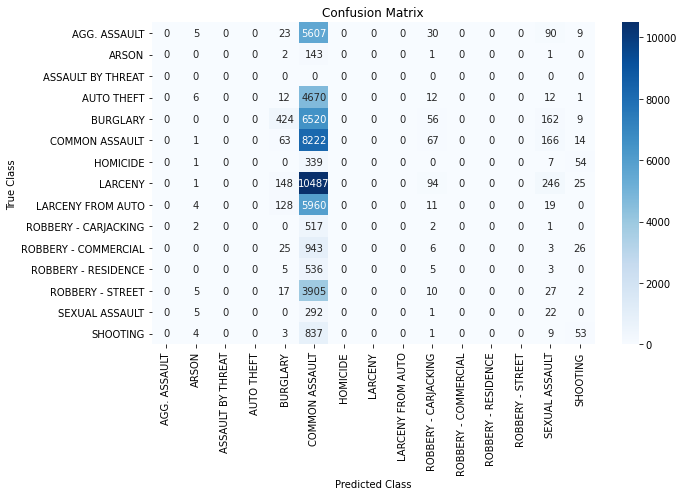

In [94]:
labels = list(Description[0])
plt.figure(figsize=(10,7))
sns.heatmap(cm, xticklabels= labels, yticklabels=labels,annot = True, fmt='g', cmap="Blues");
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.tight_layout()
plt.savefig("../images/Confusion_demo.png")
plt.show()